## PLANTEAMIENTO DEL PROBLEMA
1. Somos parte de una empresa llamada SECOND CARS y vendemos coches usados.
2. Durante un estudio reciente de la empresa, se observó que los vendedores no ponen el precio correctamente a los coches   'Chevrolet'. Algunos de los coches tienen un precio demasiado alto y otros tienen un precio muy bajo, lo que ha causado pérdidas sustanciales en el trimestre anterior.
3. Para remediar esto, la dirección nos ha encargado crear un modelo que prediga de manera eficiente el precio de los automóviles con un error mínimo. De modo que sea útil para los vendedores al fijar correctamente el precio del automóvil.

## PROCESO DE SOLUCIÓN

###  1. Carga de datos

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Carga los datos
df=pd.read_csv('car_price_data.csv')

In [4]:
# Entiende las dimensiones
df.shape

(5101, 9)

In [10]:
# Revisa las 100 primeras filas
df.head(100)

,year,price,km_traveled,tax,engineSize,km_per_liters,model,transmission,fuel_type
0,2018,9491,39842.43038,0,1.5,20.364398,Camaro,Manual,Petrol
1,2002,3750,18158.18322,145,3.0,30.015166,TrailBlazer,Other,Petrol
2,2002,27000,24391.15704,0,1.5,25.040982,Silverado 2500 Extended Cab,Manual,Diesel
3,2005,19200,14405.20234,0,1.8,24.530809,Astro Cargo,Semi-Auto,Hybrid
4,2002,11995,34639.43416,145,1.0,24.658352,S10 Extended Cab,Automatic,Diesel
...,...,...,...,...,...,...,...,...,...
95,1994,10890,22516.27594,140,1.0,31.588199,Lumina Passenger,Other,Petrol
96,2018,6699,10309.43204,0,2.5,27.889446,Colorado Crew Cab,Semi-Auto,Hybrid
97,2001,10390,38426.21118,0,1.0,26.103842,Express 2500 Cargo,Automatic,Petrol
98,1997,32995,18303.02382,0,1.0,30.780426,Suburban 2500,Automatic,Petrol


In [6]:
# Revisa las estadísticas
df.describe()

,year,price,km_traveled,tax,engineSize,km_per_liters
count,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000,5101.000000
mean,2005.592629,12544.586944,36194.765202,94.577534,1.462615,26.885070
std,8.020091,6502.942608,30260.285298,73.438069,0.434412,6.916482
min,1992.000000,950.000000,4.828020,0.000000,0.000000,1.190403
25%,1999.000000,8190.000000,15042.500980,0.000000,1.000000,23.552978
50%,2005.000000,10610.000000,29186.990240,135.000000,1.500000,26.699043
75%,2012.000000,14995.000000,49123.494160,145.000000,1.800000,30.015166
max,2020.000000,59995.000000,280699.473460,330.000000,3.000000,99.908840


###  2. Visualización de datos

year                AxesSubplot(0.125,0.53;0.168478x0.35)
price            AxesSubplot(0.327174,0.53;0.168478x0.35)
km_traveled      AxesSubplot(0.529348,0.53;0.168478x0.35)
tax              AxesSubplot(0.731522,0.53;0.168478x0.35)
engineSize          AxesSubplot(0.125,0.11;0.168478x0.35)
km_per_liters    AxesSubplot(0.327174,0.11;0.168478x0.35)
dtype: object

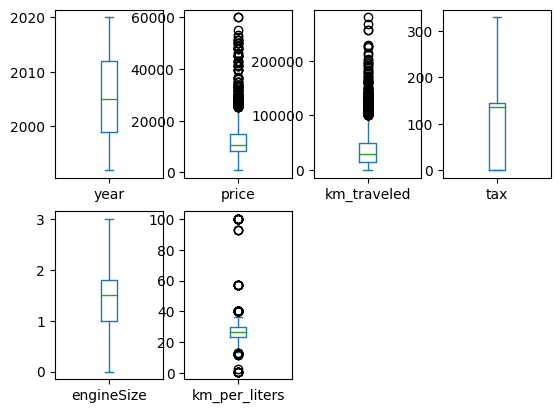

In [16]:
# Plots univariantes: box and whisker
df.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False)

array([[<AxesSubplot: title={'center': 'year'}>,
        <AxesSubplot: title={'center': 'price'}>],
       [<AxesSubplot: title={'center': 'km_traveled'}>,
        <AxesSubplot: title={'center': 'tax'}>],
       [<AxesSubplot: title={'center': 'engineSize'}>,
        <AxesSubplot: title={'center': 'km_per_liters'}>]], dtype=object)

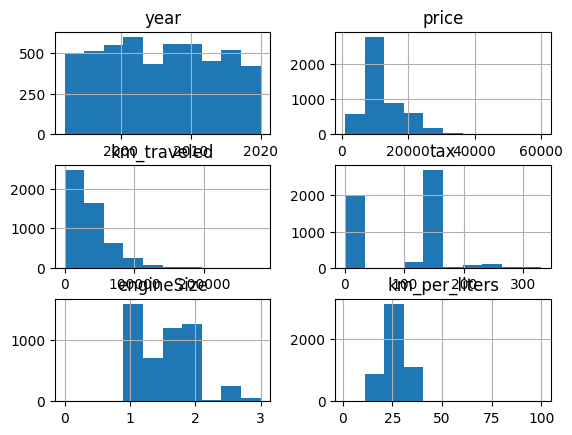

In [13]:
# Plots univariantes: histogramas
df.hist()

array([[<AxesSubplot: xlabel='year', ylabel='year'>,
        <AxesSubplot: xlabel='price', ylabel='year'>,
        <AxesSubplot: xlabel='km_traveled', ylabel='year'>,
        <AxesSubplot: xlabel='tax', ylabel='year'>,
        <AxesSubplot: xlabel='engineSize', ylabel='year'>,
        <AxesSubplot: xlabel='km_per_liters', ylabel='year'>],
       [<AxesSubplot: xlabel='year', ylabel='price'>,
        <AxesSubplot: xlabel='price', ylabel='price'>,
        <AxesSubplot: xlabel='km_traveled', ylabel='price'>,
        <AxesSubplot: xlabel='tax', ylabel='price'>,
        <AxesSubplot: xlabel='engineSize', ylabel='price'>,
        <AxesSubplot: xlabel='km_per_liters', ylabel='price'>],
       [<AxesSubplot: xlabel='year', ylabel='km_traveled'>,
        <AxesSubplot: xlabel='price', ylabel='km_traveled'>,
        <AxesSubplot: xlabel='km_traveled', ylabel='km_traveled'>,
        <AxesSubplot: xlabel='tax', ylabel='km_traveled'>,
        <AxesSubplot: xlabel='engineSize', ylabel='km_traveled'>,

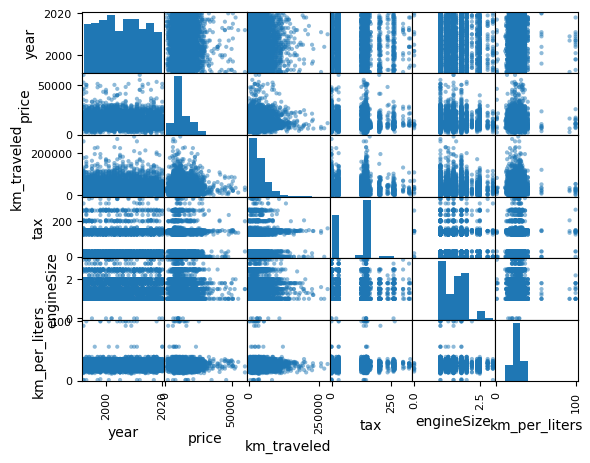

In [14]:
from pandas.plotting import scatter_matrix

# Plots multivariantes: scattered_matrix
scatter_matrix(df)

In [18]:
# Verifica la correlación
corr= df.corr()
corr

,year,price,km_traveled,tax,engineSize,km_per_liters
year,1.000000,-0.013022,-0.019366,-0.002764,-0.004569,0.001072
price,-0.013022,1.000000,-0.002491,-0.007105,-0.009075,-0.017848
km_traveled,-0.019366,-0.002491,1.000000,0.007029,0.006570,-0.015372
tax,-0.002764,-0.007105,0.007029,1.000000,-0.007840,0.020564
engineSize,-0.004569,-0.009075,0.006570,-0.007840,1.000000,-0.005883
km_per_liters,0.001072,-0.017848,-0.015372,0.020564,-0.005883,1.000000


In [19]:
corr.style.background_gradient(cmap='coolwarm', axis=None)

,year,price,km_traveled,tax,engineSize,km_per_liters
year,1.000000,-0.013022,-0.019366,-0.002764,-0.004569,0.001072
price,-0.013022,1.000000,-0.002491,-0.007105,-0.009075,-0.017848
km_traveled,-0.019366,-0.002491,1.000000,0.007029,0.006570,-0.015372
tax,-0.002764,-0.007105,0.007029,1.000000,-0.007840,0.020564
engineSize,-0.004569,-0.009075,0.006570,-0.007840,1.000000,-0.005883
km_per_liters,0.001072,-0.017848,-0.015372,0.020564,-0.005883,1.000000


###  3. Preparación de datos

In [ ]:
# Limpia los datos

In [ ]:
# Completa datos

In [ ]:
# Separa las features del target

In [9]:
# Si condiseras que hay demasiadas variables aplica PCA

In [ ]:
# Separa variables categóricas de numéricas

In [ ]:
# Procesa las variables categóricas:One Hot Encoding y OrdinalEncoder

In [10]:
# Procesa las variables numéricas

In [ ]:
# Genera el dataframe global

### 4. Selecciona un modelo

In [4]:
# Define una lista de candidatos a probar para el problema

In [11]:
# Selecciona un algoritmo

In [ ]:
# Define las métricas

In [5]:
# Genera un análisis CV

In [6]:
# Verifica los errores de training y testing, así como el overfitting underfitting

In [ ]:
# Si es necesario aplica ingeniería de variables

In [ ]:
# Buscar los mejores hiperparámetros para el modelo

In [8]:
# Entrena tu modelo con los mejores hiperparámetros

In [ ]:
# Repite este proceso para otros modelos candidatos

### 5. Publica el modelo

In [ ]:
# Serializa el modelo

In [ ]:
# Carga tu modelo en una aplicación